## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/vaasu2002/Machine-Learning-Projects/main/Titanic%20-%20Machine%20Learning%20from%20Disaster/titanic_survival.csv.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

**Observation-** There are total 12 features and 891 rows of data.

**Understanding the dataset**


The features given are 
PassengerId, Survivied, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, 

*   PassengerId
*   Survivied
*   Pclass     (there are 3 classes)
*   Name 
*   Sex
*   Age
*   Sibsp -     Siblings and spouse
*   Parch -     Parent and Children
*   Ticket
*   Fare
*   Embarked ( three classes S,C,Q)
*   Cabin

## **GOAL** - Predict if a passenger survived the sinking of the Titanic or not. 

## Exploratory Data Analysis
We will be performing EDA in the given dataset

Steps being followed:-
*   DEALING WITH MISSING DATA

Fidning `Age` by corr with Pclass




### Missing Data

In [4]:
# Null values will be marked as True
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Will give number of null values feature wise
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observation:-** We there are null values in Age, Cabin and Embarked features(colume). 

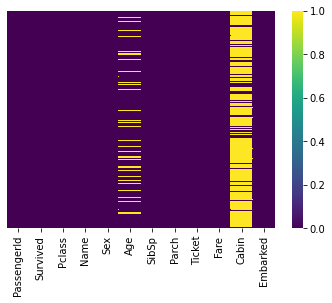

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

**Observation:** Out of 891 rows of data *177* are mising in  `Age` and 687 in  `Cabin`.

So I will be performing feature engineering in `Age` to get missing values and will drop `Cabin` feature from the dataset.

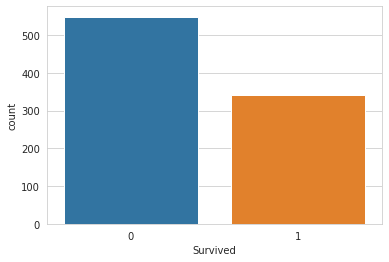

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Observation:-** Out of 891 passangers. *549 lost their life and only 342 survived.*

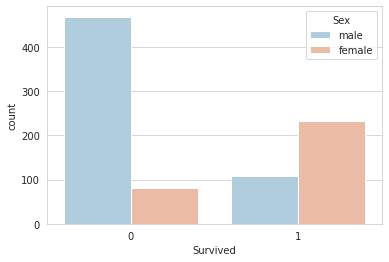

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

**Observation:-** Male have more chances to die

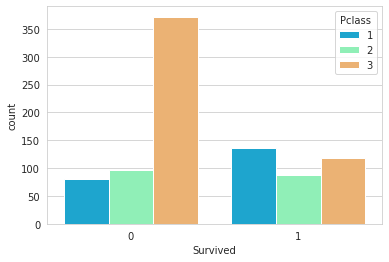

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

**Observation:-** Higher class have high chances of survival

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


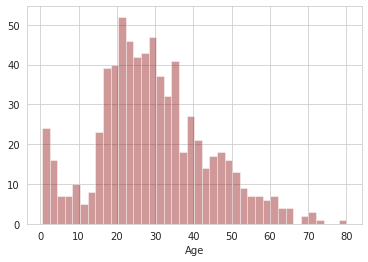

In [11]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

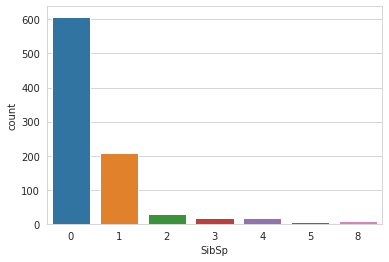

In [12]:
sns.countplot(x='SibSp',data=df)

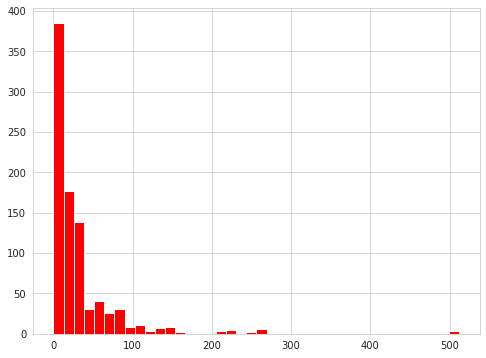

In [13]:
df['Fare'].hist(color='red',bins=40,figsize=(8,6))

In [14]:
correlation_matrix = df.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


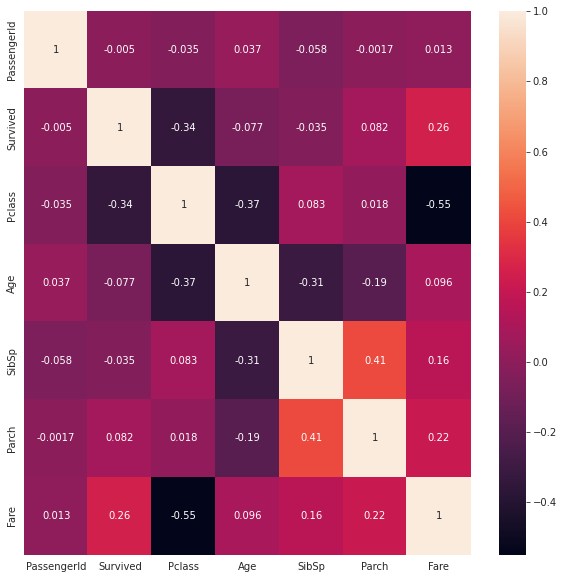

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)  # annot = True to print the values inside the square

**Observation-** We see there is a correlation between `Age` and `Pclass`. It might help to find missing values of `Age`.



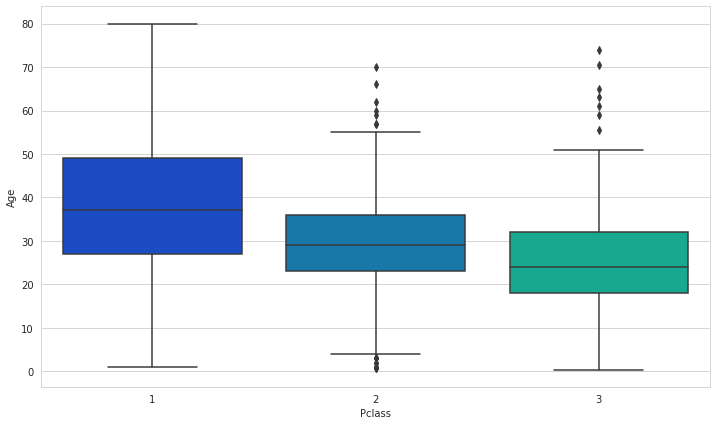

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

**Observation**- We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on `Pclass` for `Age`.

In [17]:
def impute_age(Column):
    Age = Column[0]
    Pclass = Column[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

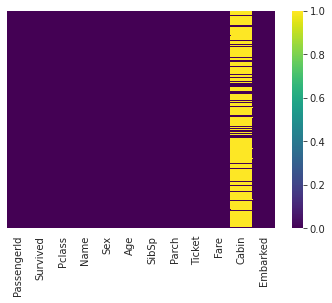

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [19]:
df[["Pclass", "Survived","Fare"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived,Fare
0,1,0.629630,84.154687
1,2,0.472826,20.662183
2,3,0.242363,13.675550


**Observation**- We can see the wealthier passengers in the higher classes have more chances of survivial.


In [20]:
df[["Embarked", "Survived","Fare"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived,Fare
0,C,0.553571,59.954144
1,Q,0.389610,13.276030
2,S,0.336957,27.079812


### Dropping useless columns

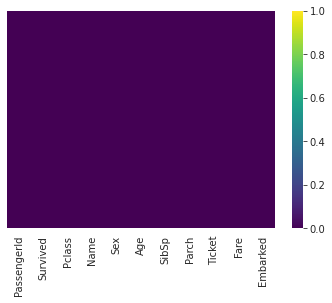

In [21]:
df.drop('Cabin',axis=1,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [22]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


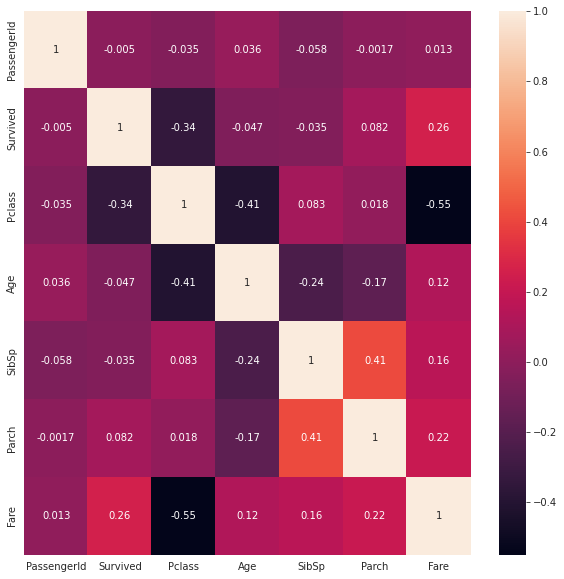

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)  # annot = True to print the values inside the square

In [24]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
df['Sex']=df['Sex'].apply(lambda x:d[x])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,24.0,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [25]:
df = df.dropna(how='any',axis=0) 
df.shape

(889, 9)

In [26]:
e={'C':0, 'Q':1 ,'S':2}
df['Embarked']=df['Embarked'].apply(lambda x:e[x])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2
887,888,1,1,1,19.0,0,0,30.0000,2
888,889,0,3,1,24.0,1,2,23.4500,2
889,890,1,1,0,26.0,0,0,30.0000,0


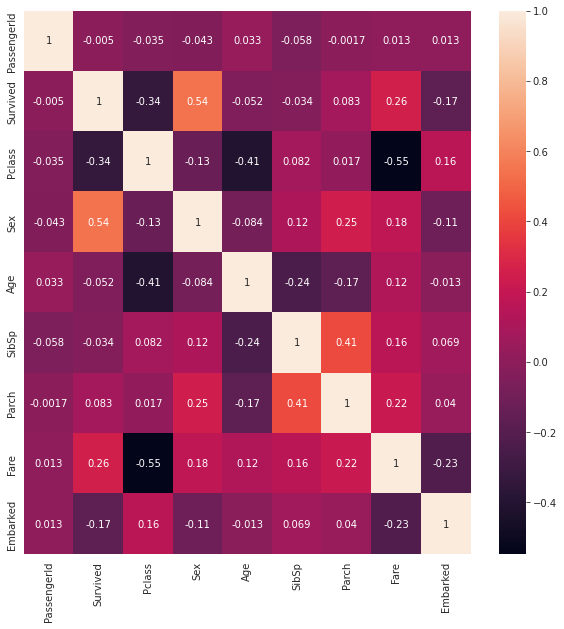

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)  # annot = True to print the values inside the square

### Download the corrected data

In [28]:
from google.colab import files
df.to_csv('Titanic_dataset.csv')
files.download('Titanic_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>